In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.pyplot import axes
import scipy
from scipy import signal

In [2]:
import numpy as np
from numpy import correlate

In [3]:
import math
#import math.exp as exp

In [4]:
import astropy
from astropy.io import fits

In [5]:
import scipy
from scipy import optimize

In [6]:
fitspec = fits.open('spec-1373-53063-0583.fits')

In [7]:
data =  fitspec[1].data
x_dat = data['loglam']
y_dat = data['flux'] - data['model']
#x_dat = 10**x_dat

In [8]:
data['loglam']

array([3.5801, 3.5802, 3.5803, ..., 3.9631, 3.9632, 3.9633], dtype=float32)

In [9]:
x_dat

array([3.5801, 3.5802, 3.5803, ..., 3.9631, 3.9632, 3.9633], dtype=float32)

In [10]:
len(x_dat)

3833

In [11]:
len(y_dat)

3833

In [12]:
SII = 6718.2943
SII_2 = 6732.68
NII = 6549.86
NII_2 = 6585.27
H_alpha = 6564.6140

In [13]:
c = 0.00015 #sigma

In [14]:
def gaussian(x, a, b, c):
    return a*math.exp(-((x-b)**2)/(2*c**2))
gaussian = np.vectorize(gaussian)

In [15]:
x = data['loglam']

In [16]:
y1 = gaussian(x, 23.8, math.log(H_alpha, 10), c)
y2 = gaussian(x, 6, math.log(SII, 10), c)
y3 = gaussian(x, 6, math.log(SII_2, 10), c)
y4 = gaussian(x, 5, math.log(NII, 10), c)
y5 = gaussian(x, 10, math.log(NII_2, 10), c)

In [17]:
x_test = np.linspace(x_dat[1],x_dat[len(x_dat)-1],len(x_dat))
y_test = y1+y2+y3+y4+y5

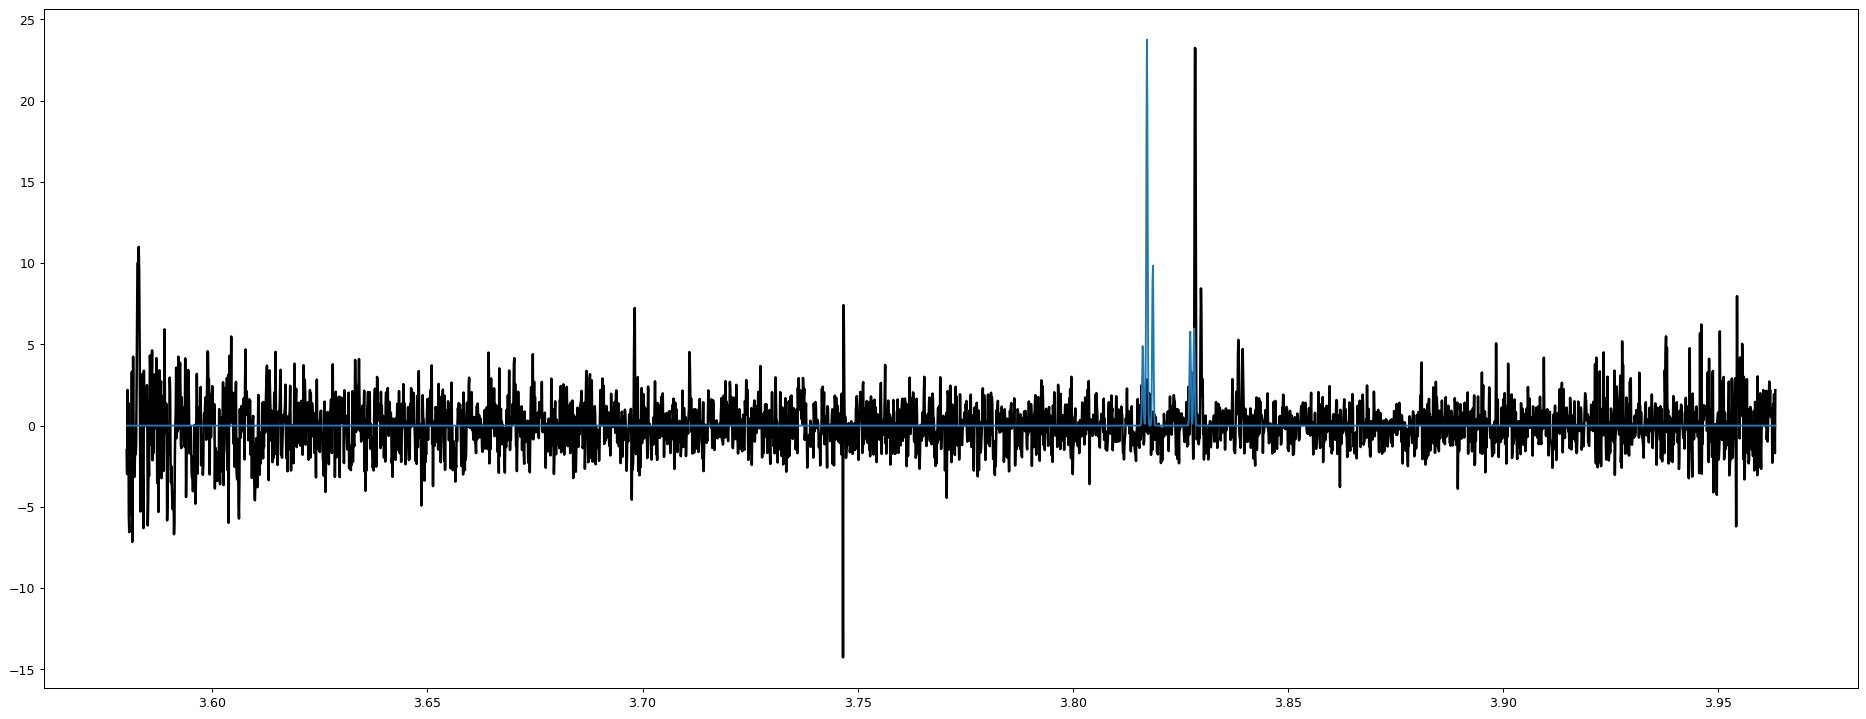

In [18]:
figure(figsize=(26, 10), dpi=90)
y_dat_med = scipy.signal.medfilt(y_dat, kernel_size=81)
y_smoothed = y_dat-y_dat_med
plt.plot(x_dat, y_smoothed, color='black', linewidth=2)
plt.plot(x_test,y_test)

(3.81, 3.85)

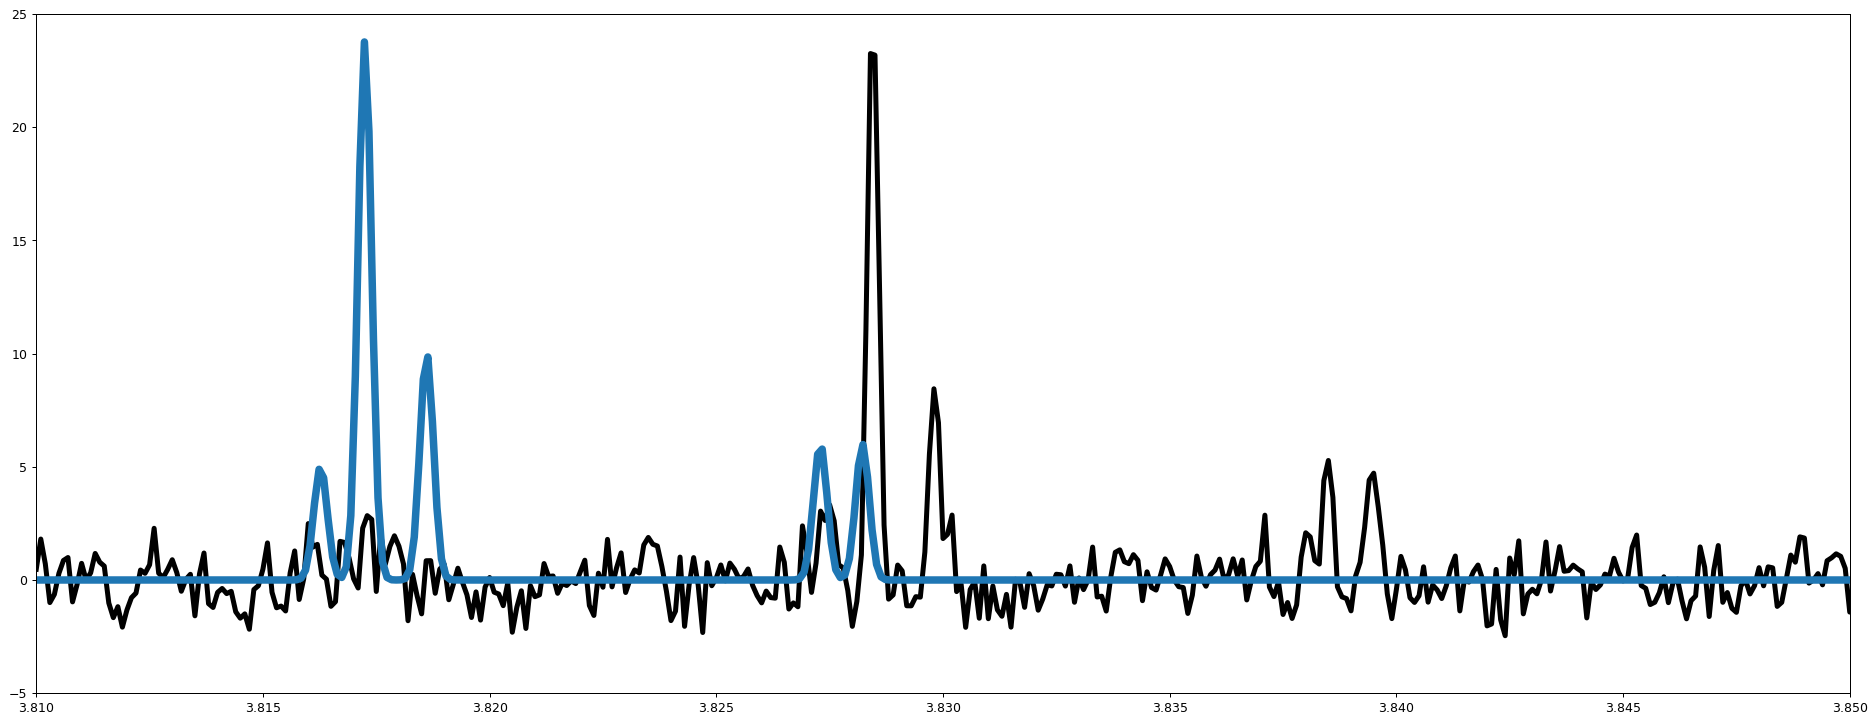

In [19]:
figure(figsize=(26, 10), dpi=90)
y_dat_med = scipy.signal.medfilt(y_dat, kernel_size=81)
y_smoothed = y_dat-y_dat_med
plt.plot(x_dat, y_smoothed, color='black', linewidth=4)
plt.plot(x_test,y_test, linewidth=6)
plt.ylim(-5, 25)
plt.xlim(3.81, 3.85)

In [20]:
corr_thing = correlate(y_test, y_smoothed, mode = 'full')

In [21]:
corr_thing

array([0., 0., 0., ..., 0., 0., 0.])

In [22]:
x_steps_test = np.linspace(0,len(corr_thing),len(corr_thing))
y_sum_test = corr_thing

In [23]:
len(corr_thing)

7665

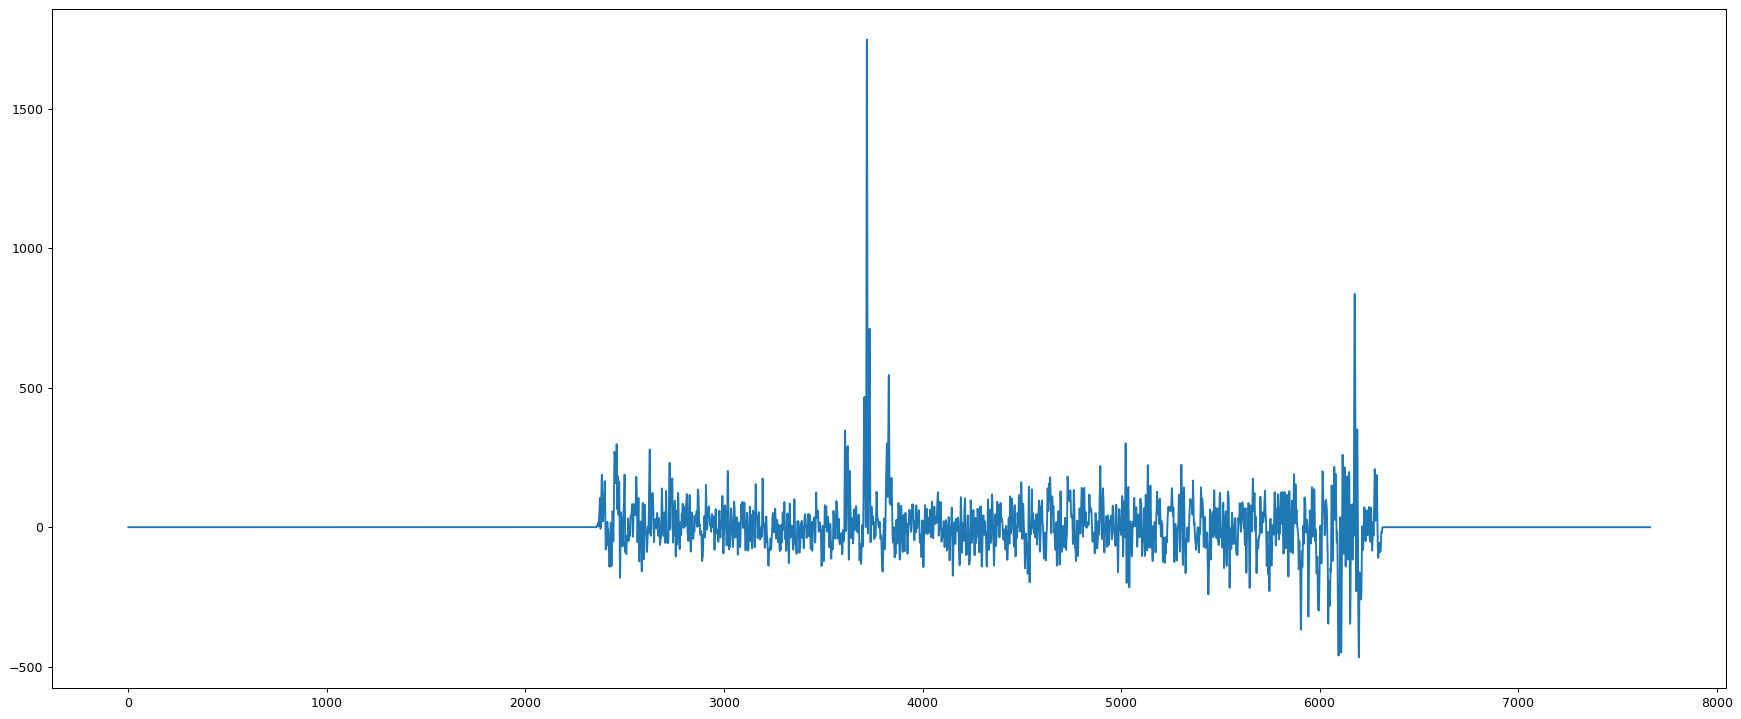

In [24]:
figure(figsize=(24, 10), dpi=90)
plt.plot(x_steps_test,y_sum_test)


In [25]:
maxline = list(y_sum_test).index(max(list(y_sum_test)))
k = len(x_dat) - x_steps_test[maxline]

In [26]:
maxline

3720

In [27]:
c0 = 299792458

In [28]:
dig = 0.0001 #лог
z = 10**(k*dig) - 1
z

0.026245962184813454

Тут начинаются ошибки

In [29]:
popt,pcov = scipy.optimize.curve_fit(gaussian,x_steps_test,y_sum_test,p0=[max(y_sum_test),x_steps_test[list(y_sum_test).index(max(y_sum_test))],3.])

In [30]:
pcov

array([[ 2.19663457e+03,  4.45479112e-05, -1.45759460e+00],
       [ 4.45479112e-05,  2.90159597e-03, -4.43474668e-08],
       [-1.45759460e+00, -4.43474668e-08,  2.90159600e-03]])

In [31]:
perr = np.sqrt(np.diag(pcov))
perr

array([46.86826828,  0.05386646,  0.05386646])

In [32]:
mean_ac = perr[1]
k_ac = mean_ac/k

In [33]:
z_ac = 10**((mean_ac)*dig) - 1

In [34]:
z_ac*c0/1000

3.7184123990354223

Тут начинается новый спектр который мы делаем

In [35]:
fitspec1 = fits.open('spec-0617-52072-0448.fits')

In [36]:
data1 =  fitspec1[1].data
x_dat1 = data1['loglam']
y_dat1 = data1['flux'] - data1['model']
x_test1 = np.linspace(x_dat1[1],x_dat1[len(x_dat1)-1],len(x_dat1))

In [37]:
x1 = data1['loglam']
y1_1 = gaussian(x1, 14, math.log(H_alpha, 10), c)
y2_1 = gaussian(x1, 4, math.log(SII, 10), c)
y3_1 = gaussian(x1, 5, math.log(SII_2, 10), c)
y4_1 = gaussian(x1, 4, math.log(NII, 10), c)
y5_1 = gaussian(x1, 8, math.log(NII_2, 10), c)
y_test1 = y1_1+y2_1+y3_1+y4_1+y5_1

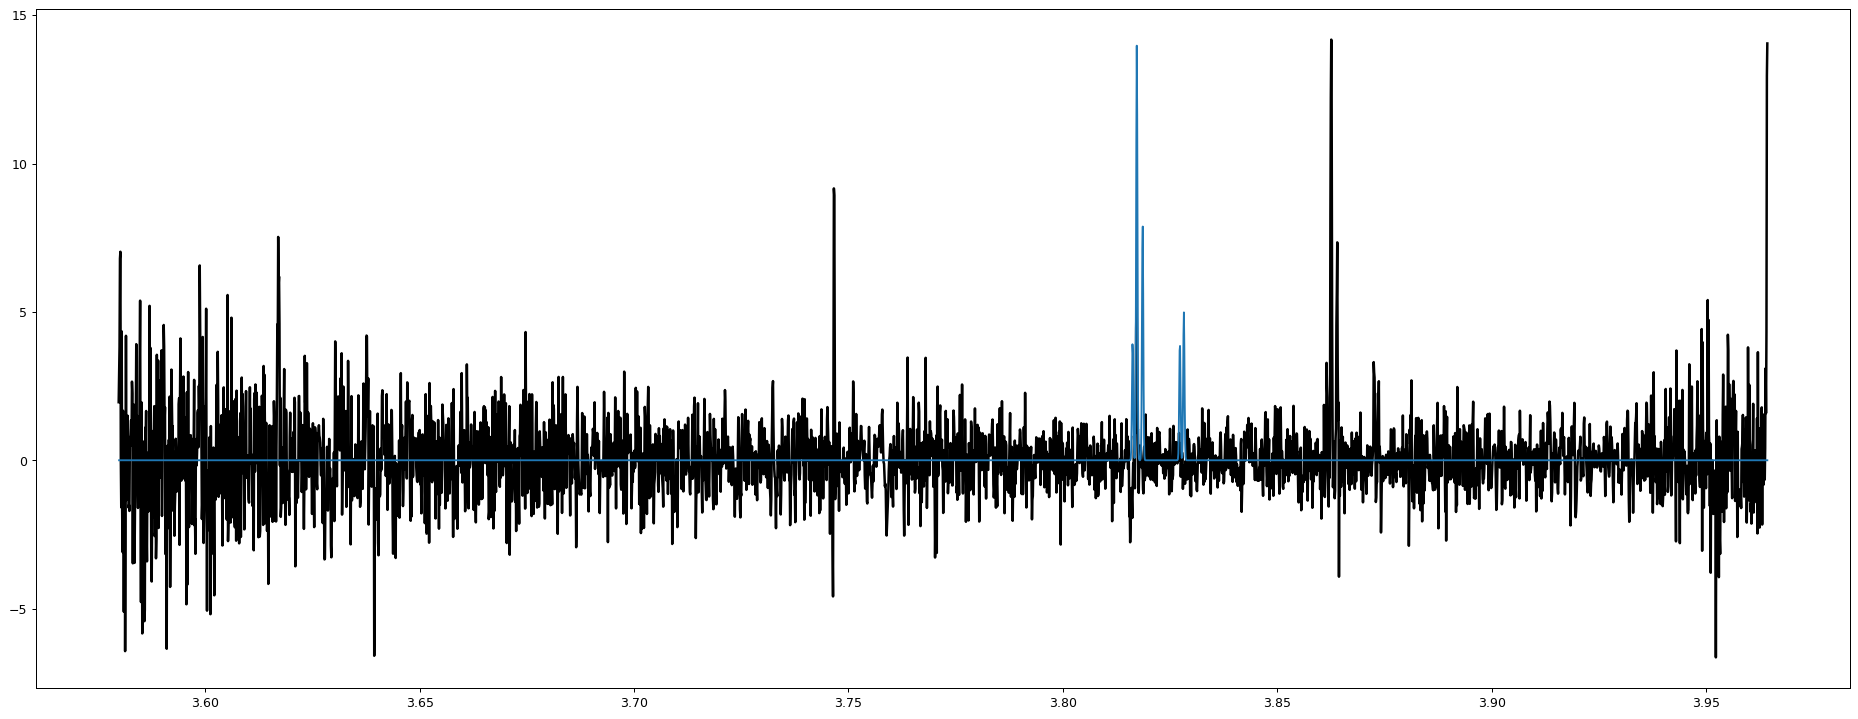

In [38]:
figure(figsize=(26, 10), dpi=90)
y_dat_med1 = scipy.signal.medfilt(y_dat1, kernel_size=81)
y_smoothed1 = y_dat1-y_dat_med1
plt.plot(x_dat1, y_smoothed1, color='black', linewidth=2)
plt.plot(x_test1,y_test1)

In [39]:
corr_thing1 = correlate(y_test1, y_smoothed1, mode = 'full')
#x_steps_test1 = np.linspace(0,len(corr_thing1),len(corr_thing1))
x_steps_test1 = [i for i in range(len(corr_thing1))]
y_sum_test1 = corr_thing1

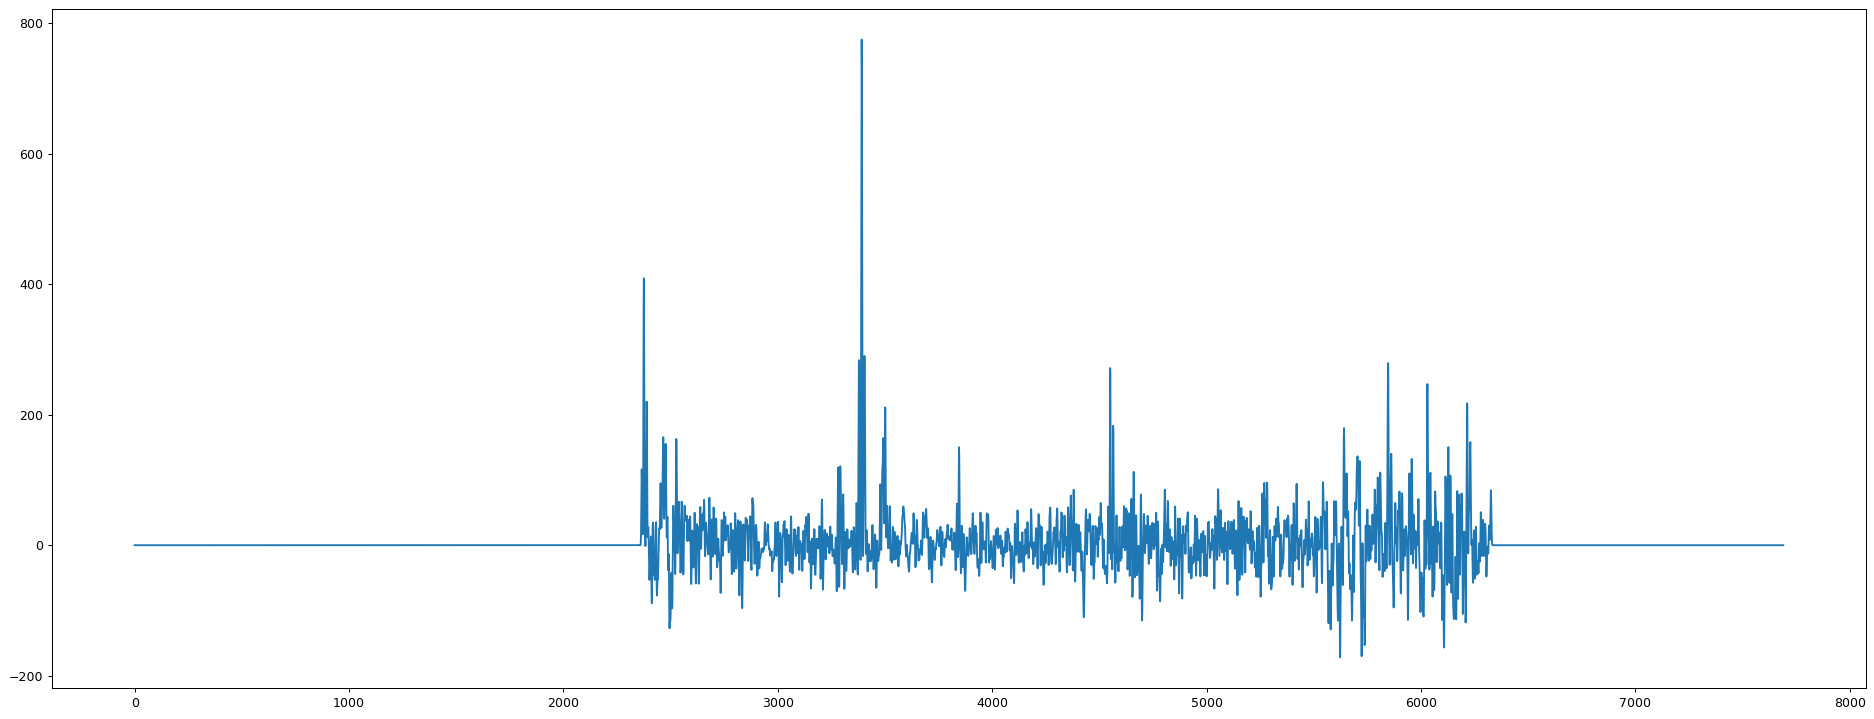

In [40]:
figure(figsize=(26, 10), dpi=90)
plt.plot(x_steps_test1,y_sum_test1)

In [41]:
maxline1 = list(y_sum_test1).index(max(list(y_sum_test1)))
k1 = len(x_dat1) - x_steps_test1[maxline1]
k1

455

In [42]:
maxline1

3391

In [43]:
z1 = 10**(k1*dig) - 1

In [44]:
z1

0.11045253533364008

In [45]:
z1*c0/1000

33112.83706000381

In [46]:
popt1,pcov1 = scipy.optimize.curve_fit(gaussian,x_steps_test1,y_sum_test1,p0=[max(y_sum_test1),x_steps_test1[list(y_sum_test1).index(max(y_sum_test1))],3.])

In [47]:
perr1 = np.sqrt(np.diag(pcov1))
perr1

array([22.96251114,  0.06298992,  0.06298992])

In [48]:
mean_ac1 = perr1[1]
k_ac1 = mean_ac1/k1

In [49]:
z_ac = 10**((mean_ac)*dig) - 1
z_ac*c0/1000

3.7184123990354223